In [1]:
# Importing the EfficientNetB4 model from TensorFlow's applications module
from tensorflow.keras.applications import EfficientNetB4
import pandas as pd  # For working with data in tabular format
import numpy as np # For numerical operations
import cv2 # For computer vision tasks
import os # For file and directory operations
import sklearn #model evaluation
import random  # For generating random numbers
from PIL import Image  # For working with images
import matplotlib.pyplot as plt  # For plotting graphs and images
from pathlib import Path
import seaborn as sns
print('Success') # Printing a message to indicate success

Success


In [2]:
# Specify the folder path you want to list files and directories from
folder_path = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input"
# Define the paths to the directories on your local machine
benignkeratosis_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\BenignKeratosis"
melanoma_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\Melanoma"
basalcell_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\BasalCellCarcinoma"
squammous_directory="C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\SquamousCellCarcinoma"
# List the files and directories in each of the specified directories
benignimages=os.listdir(benignkeratosis_directory)
melanomaimages = os.listdir(melanoma_directory)
basalimages = os.listdir(basalcell_directory)
benign_count = len(benignimages)
melanoma_count = len(melanomaimages)
squammousimages = os.listdir(squammous_directory)
basal_count = len(basalimages)
total_count=benign_count+melanoma_count+basal_count+squammous_count
print('The total no odf images:',total_count)

The total no odf images: 10469


In [3]:
# Path to the CSV file
csv_file_path = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\ISIC_2019_Training_GroundTruth.csv"

# Read the CSV file and rename the DataFrame as 'ground'
ground = pd.read_csv(csv_file_path)

# Display the content of the 'ground' DataFrame
print(ground)

              image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]


In [4]:
# Path to the CSV file
csv_file_path = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\ISIC_2019_Training_Metadata.csv"

# Read the CSV file
metadata = pd.read_csv(csv_file_path)

# Display the content of the CSV file
print(metadata)

              image  age_approx anatom_site_general    lesion_id     sex
0      ISIC_0000000        55.0      anterior torso          NaN  female
1      ISIC_0000001        30.0      anterior torso          NaN  female
2      ISIC_0000002        60.0     upper extremity          NaN  female
3      ISIC_0000003        30.0     upper extremity          NaN    male
4      ISIC_0000004        80.0     posterior torso          NaN    male
...             ...         ...                 ...          ...     ...
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male

[25331 rows x 5 columns]


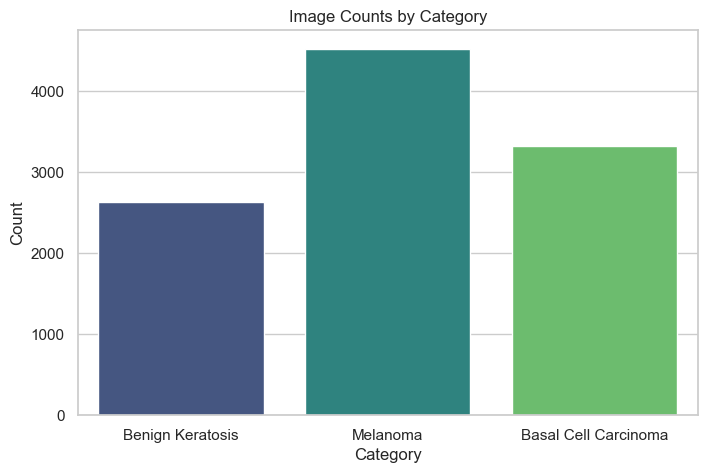

In [5]:
data = {
    'Category': ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma','Squamous Cell Carcinoma'],
    'Count': [benign_count, melanoma_count, basal_count]
}
df = pd.DataFrame(data)
# Define your custom color palette with three distinct colors
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Create the countplot
sns.barplot(x='Category', y='Count', data=df, palette='viridis')
plt.title('Image Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.show()

In [ ]:
# Function to load images and assign labels
def load_images_and_labels(directory, label):
    data, labels = [], []

    for image_path in directory.glob('*.jpg'): 
        if image_path.is_file():
            try:
                image = cv2.imread(str(image_path))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure images have RGB channels
                image = cv2.resize(image, (224, 224))
                data.append(image)
                labels.append(label)
                print(f"Loaded image: {image_path.name} with label {label}, size: {image.shape}")
            except AttributeError:
                print(f"Error loading image: {image_path.name}")

    return data, labels

# Load images and assign labels for each category
benign_data, benign_labels = load_images_and_labels(Path(benignkeratosis_directory), 0)
melanoma_data, melanoma_labels = load_images_and_labels(Path(melanoma_directory), 1)
basal_data, basal_labels = load_images_and_labels(Path(basalcell_directory), 2)
squamous_data, basal_labels = load_images_and_labels(Path(basalcell_directory), 2)
# Combine data and labels for all categories
data = np.concatenate((benign_data, melanoma_data, basal_data), axis=0)
labels = np.concatenate((benign_labels, melanoma_labels, basal_labels), axis=0)

# Verify the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Loaded image: benignkeratosis_ISIC_0010491.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012086_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012090_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012103_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012117_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012134_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012136_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012143_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012155_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012170_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012172_downsampled.jpg with label 0, size: (22

Loaded image: benignkeratosis_ISIC_0012757_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012772_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012773_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012785_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012786_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012790_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012792_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012800_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012810_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012811.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0012813_downsampled.jpg with label 0, size: (22

Loaded image: benignkeratosis_ISIC_0013493_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013580_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013584_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013585_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013621_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013625_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013632_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013635_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013637_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013667_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0013673_downsampled.jpg with label 

Loaded image: benignkeratosis_ISIC_0014573_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014574_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014575_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014576_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014577_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014578_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014579_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014580_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014581_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014582_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0014583_downsampled.jpg with label 

Loaded image: benignkeratosis_ISIC_0015260_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0015295_downsampled.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024312.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024324.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024336.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024337.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024338.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024358.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024371.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024381.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024382.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0024383.jpg with label 0, size: (224, 224, 3)
Load

Loaded image: benignkeratosis_ISIC_0025276.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025286.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025292.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025297.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025312.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025326.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025330.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025337.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025339.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025345.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025351.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0025366.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0026245.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026248.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026249.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026262.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026263.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026265.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026273.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026276.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026277.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026280.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026286.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0026290.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0027154.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027162.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027167.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027192.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027194.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027202.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027218.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027219.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027239.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027270.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027275.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0027279.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0028258.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028264.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028294.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028308.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028309.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028331.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028336.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028343.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028347.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028354.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028376.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0028386.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0029232.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029233.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029235.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029243.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029249.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029251.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029260.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029270.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029288.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029289.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029291.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0029301.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0030137.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030160.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030172.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030173.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030188.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030189.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030203.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030207.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030208.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030226.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030227.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0030231.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0031289.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031321.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031326.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031329.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031334.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031345.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031349.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031352.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031362.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031376.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031394.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0031396.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0032283.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032303.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032304.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032306.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032315.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032325.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032330.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032335.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032343.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032348.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032358.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0032359.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0033361.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033378.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033379.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033391.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033397.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033400.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033401.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033410.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033414.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033437.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033438.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0033446.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0034151.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034165.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034167.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034168.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034175.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034186.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034189.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034197.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034201.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034221.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034235.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0034252.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0055100.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055146.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055151.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055164.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055166.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055182.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055185.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055215.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055219.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055234.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055235.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0055256.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0057063.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057068.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057080.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057085.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057098.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057127.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057160.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057210.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057222.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057245.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057248.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0057250.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0058932.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058938.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058942.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058944.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058974.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0058990.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059011.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059022.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059035.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059049.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059053.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0059055.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0060824.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060833.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060847.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060856.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060857.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060875.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060879.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060881.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060902.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060920.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060923.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0060925.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0062421.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062424.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062549.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062555.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062561.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062566.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062571.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062574.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062581.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062587.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062590.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0062630.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0064567.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064586.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064654.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064670.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064678.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064687.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064695.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064700.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064702.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064740.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064741.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0064748.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0066313.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066345.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066385.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066389.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066450.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066455.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066472.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066474.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066522.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066547.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066587.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0066594.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0068365.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068366.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068398.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068422.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068426.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068436.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068467.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068479.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068504.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068521.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068533.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0068550.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0070127.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070176.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070187.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070219.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070230.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070238.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070241.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070245.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070261.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070272.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070284.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0070300.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: benignkeratosis_ISIC_0072050.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072054.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072055.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072057.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072058.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072070.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072075.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072098.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072139.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072149.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072153.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosis_ISIC_0072161.jpg with label 0, size: (224, 224, 3)
Loaded image: benignkeratosi

Loaded image: melanoma_ISIC_0000149_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000150_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000151_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000152_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000153_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000154_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000155_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000156_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000157.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000159.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000160.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0000161.jpg with label 1, size: (224, 224, 3)
Loaded image: me

Loaded image: melanoma_ISIC_0009882.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009897.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009898.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009905.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009910.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009918.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009927.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009934.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009950.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009955.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009960.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009971.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009992.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0009993.jp

Loaded image: melanoma_ISIC_0012887_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012930_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012988_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012989_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0012990_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013072_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013073_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013079_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013141_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013184_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013198_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013232_downsampled.jpg wi

Loaded image: melanoma_ISIC_0013969_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013972_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013975_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013984_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013986_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013987_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013988_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013995_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0013997_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014013_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014027_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014037_downsampled.jpg wi

Loaded image: melanoma_ISIC_0014542_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014543_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014545_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014546_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014548_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014557_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014558_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014559_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014663_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014666_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014688_downsampled.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0014695_downsampled.jpg wi

Loaded image: melanoma_ISIC_0024865.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024875.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024886.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024898.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024900.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024911.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024918.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024929.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024930.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024932.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024940.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024951.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024952.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0024958.jp

Loaded image: melanoma_ISIC_0026158.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026167.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026188.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026207.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026229.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026236.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026239.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026247.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026258.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026266.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026268.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026281.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026296.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0026314.jp

Loaded image: melanoma_ISIC_0027402.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027407.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027420.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027436.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027442.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027480.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027487.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027502.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027507.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027517.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027552.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027560.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027561.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0027573.jp

Loaded image: melanoma_ISIC_0028718.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028746.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028760.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028764.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028773.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028777.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028847.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028860.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028878.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028897.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028898.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028899.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028900.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0028901.jp

Loaded image: melanoma_ISIC_0030110.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030119.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030122.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030129.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030134.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030150.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030165.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030171.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030183.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030187.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030192.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030211.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030223.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0030238.jp

Loaded image: melanoma_ISIC_0031565.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031586.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031598.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031642.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031666.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031670.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031709.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031711.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031718.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031741.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031745.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031746.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031778.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0031779.jp

Loaded image: melanoma_ISIC_0032624.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032626.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032629.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032630.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032637.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032638.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032645.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032653.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032656.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032662.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032672.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032684.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032685.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0032687.jp

Loaded image: melanoma_ISIC_0033272.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033274.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033275.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033278.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033279.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033286.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033287.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033299.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033300.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033302.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033304.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033310.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033312.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033317.jp

Loaded image: melanoma_ISIC_0033925.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033931.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033938.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033942.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033946.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033947.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033953.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033956.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033957.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033962.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033967.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033968.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033975.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0033977.jp

Loaded image: melanoma_ISIC_0053545.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053555.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053570.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053582.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053594.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053603.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053611.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053615.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053617.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053620.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053628.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053644.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053659.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0053660.jp

Loaded image: melanoma_ISIC_0054287.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054288.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054289.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054290.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054292.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054302.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054312.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054317.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054329.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054332.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054334.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054341.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054350.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0054351.jp

Loaded image: melanoma_ISIC_0055039.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055046.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055048.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055051.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055054.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055079.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055081.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055086.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055087.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055091.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055105.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055136.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055140.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055141.jp

Loaded image: melanoma_ISIC_0055810.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055818.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055820.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055825.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055828.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055832.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055840.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055841.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055859.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055862.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055876.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055887.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055892.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0055899.jp

Loaded image: melanoma_ISIC_0056625.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056626.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056632.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056638.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056655.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056659.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056660.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056663.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056670.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056676.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056677.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056692.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056694.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0056710.jp

Loaded image: melanoma_ISIC_0057450.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057457.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057462.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057482.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057496.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057518.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057531.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057534.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057539.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057545.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057550.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057554.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057556.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0057558.jp

Loaded image: melanoma_ISIC_0058303.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058307.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058315.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058319.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058321.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058331.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058332.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058341.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058344.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058346.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058362.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058366.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058367.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0058368.jp

Loaded image: melanoma_ISIC_0059218.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059219.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059229.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059232.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059248.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059253.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059264.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059270.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059273.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059281.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059291.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059294.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059301.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059313.jp

Loaded image: melanoma_ISIC_0059976.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059983.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059987.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0059992.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060017.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060022.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060032.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060033.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060080.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060091.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060094.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060096.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060099.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060104.jp

Loaded image: melanoma_ISIC_0060817.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060827.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060829.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060832.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060834.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060845.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060854.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060873.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060883.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060886.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060893.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060897.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060934.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0060936.jp

Loaded image: melanoma_ISIC_0061606.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061623.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061624.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061625.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061626.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061629.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061630.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061636.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061643.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061647.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061660.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061664.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061670.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0061680.jp

Loaded image: melanoma_ISIC_0062423.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062425.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062434.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062442.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062443.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062447.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062454.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062458.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062463.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062468.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062471.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062474.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062477.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0062481.jp

Loaded image: melanoma_ISIC_0063164.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063168.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063172.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063174.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063180.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063181.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063182.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063190.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063191.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063198.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063207.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063208.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063223.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0063225.jp

Loaded image: melanoma_ISIC_0064034.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064058.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064060.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064062.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064066.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064072.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064073.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064079.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064080.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064089.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064102.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064107.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064110.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064113.jp

Loaded image: melanoma_ISIC_0064905.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064907.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064909.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064910.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064919.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064925.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064926.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064927.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064933.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064934.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064936.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064941.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064943.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0064965.jp

Loaded image: melanoma_ISIC_0065709.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065714.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065720.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065723.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065727.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065728.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065735.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065740.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065742.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065746.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065748.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065766.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065767.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0065774.jp

Loaded image: melanoma_ISIC_0066564.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066588.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066589.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066593.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066600.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066603.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066613.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066615.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066626.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066627.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066633.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066637.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066643.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0066649.jp

Loaded image: melanoma_ISIC_0067512.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067513.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067515.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067521.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067536.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067539.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067543.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067549.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067564.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067565.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067567.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067576.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067577.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0067597.jp

Loaded image: melanoma_ISIC_0068273.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068275.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068276.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068280.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068291.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068294.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068295.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068299.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068303.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068309.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068310.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068315.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068318.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0068331.jp

Loaded image: melanoma_ISIC_0069059.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069063.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069065.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069068.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069076.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069077.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069084.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069087.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069091.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069093.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069098.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069105.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069112.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0069119.jp

Loaded image: melanoma_ISIC_0070032.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070046.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070050.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070051.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070061.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070065.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070068.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070070.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070074.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070092.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070105.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070108.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070110.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070111.jp

Loaded image: melanoma_ISIC_0070940.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070956.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070959.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070961.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070968.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070973.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070974.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070976.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070990.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070991.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070992.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0070998.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071000.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071012.jp

Loaded image: melanoma_ISIC_0071815.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071826.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071827.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071834.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071857.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071865.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071869.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071875.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071891.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071892.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071901.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071904.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071906.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0071910.jp

Loaded image: melanoma_ISIC_0072612.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072624.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072626.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072631.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072641.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072642.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072653.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072654.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072691.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072694.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072713.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072714.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072730.jpg with label 1, size: (224, 224, 3)
Loaded image: melanoma_ISIC_0072733.jp

Loaded image: basalcell_ISIC_0024885.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024897.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024931.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024949.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0024984.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0025019.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0025031.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0025046.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0025102.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0025144.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0025260.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0025266.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0025285.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0027478.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027525.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027526.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027531.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027544.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027545.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027546.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027595.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027601.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027609.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027629.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027631.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0027675.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0029489.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029501.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029515.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029524.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029539.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029545.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029546.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029564.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029602.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029644.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029647.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029655.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0029669.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0031552.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031569.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031585.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031597.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031614.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031640.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031643.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031651.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031697.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031698.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031712.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031721.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0031728.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0053472.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053474.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053483.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053487.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053500.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053501.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053504.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053511.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053514.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053524.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053534.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053535.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0053537.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0054346.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054347.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054353.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054362.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054365.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054370.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054390.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054396.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054402.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054413.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054435.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054436.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0054439.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0055096.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055098.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055108.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055109.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055111.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055119.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055123.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055135.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055137.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055178.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055180.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055194.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055201.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0055886.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055890.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055891.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055893.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055895.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055897.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055898.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055912.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055913.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055914.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055916.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055940.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0055944.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0056730.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056731.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056737.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056742.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056747.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056766.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056767.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056775.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056780.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056810.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056824.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056826.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0056835.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0057503.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057504.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057511.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057523.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057542.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057551.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057560.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057564.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057569.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057572.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057574.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057587.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0057592.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0058349.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058372.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058387.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058389.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058392.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058393.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058410.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058412.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058415.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058419.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058420.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058434.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0058447.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0059124.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059128.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059134.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059135.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059149.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059159.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059162.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059180.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059199.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059200.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059201.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059210.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059212.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0059930.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059946.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059950.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059954.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059961.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059973.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059977.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059984.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059986.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059988.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059989.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059994.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0059996.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0060702.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060738.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060740.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060748.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060780.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060789.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060798.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060803.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060818.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060823.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060825.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060842.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0060844.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

Loaded image: basalcell_ISIC_0061483.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061484.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061490.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061497.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061504.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061511.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061512.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061515.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061541.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061543.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061548.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061555.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_ISIC_0061571.jpg with label 2, size: (224, 224, 3)
Loaded image: basalcell_I

In [7]:
# Convert features and labels to NumPy arrays
feats, labels = np.array(data), np.array(labels)

# Define paths for saving and loading features and labels
feats_save_path, labels_save_path = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\feats_train.npy", "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\labels_train.npy"

# Save the arrays to the specified paths
np.save(feats_save_path, feats)
np.save(labels_save_path, labels)

# Confirm that the arrays have been saved
print("Features saved to:", feats_save_path)
print("Labels saved to:", labels_save_path)

# Load the features (data) and labels
loaded_feats, loaded_labels = np.load(feats_save_path), np.load(labels_save_path)
print("Features shape:", loaded_feats.shape)
print(loaded_feats)
print("Labels shape:", loaded_labels.shape)
print(loaded_labels)

Features saved to: C:\Users\Asus\Desktop\archive\ISIC_2019_Training_Input\Training\feats_train.npy
Labels saved to: C:\Users\Asus\Desktop\archive\ISIC_2019_Training_Input\Training\labels_train.npy
Features shape: (10469, 224, 224, 3)
[[[[122 111 109]
   [125 109 106]
   [ 92  69  67]
   ...
   [134 133 131]
   [131 130 128]
   [128 127 125]]

  [[118 110 107]
   [126 115 111]
   [109  91  87]
   ...
   [135 135 132]
   [132 131 129]
   [129 128 126]]

  [[119 109 107]
   [114 103  99]
   [123 112 106]
   ...
   [135 134 132]
   [132 131 128]
   [131 130 128]]

  ...

  [[127 116 114]
   [125 114 110]
   [125 114 108]
   ...
   [133 128 122]
   [132 128 121]
   [132 127 121]]

  [[127 117 115]
   [124 115 110]
   [125 116 109]
   ...
   [131 126 120]
   [128 123 117]
   [127 122 116]]

  [[123 115 111]
   [124 117 111]
   [130 123 115]
   ...
   [135 130 124]
   [132 127 121]
   [130 125 120]]]


 [[[ 16  17  20]
   [ 16  15  20]
   [ 15  15  17]
   ...
   [ 66  75 104]
   [ 64  79 113]

In [9]:
from sklearn.utils import shuffle

loaded_feats, loaded_labels = shuffle(loaded_feats, loaded_labels, random_state=42)  # Use a specific random state for reproducibility

In [10]:
#Train Test Split
# splitting cells images into 80:20 ratio i.e., 80% for training and 20% for testing purpose
# Split the data and labels into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(loaded_feats, loaded_labels, test_size=0.2, random_state=42)

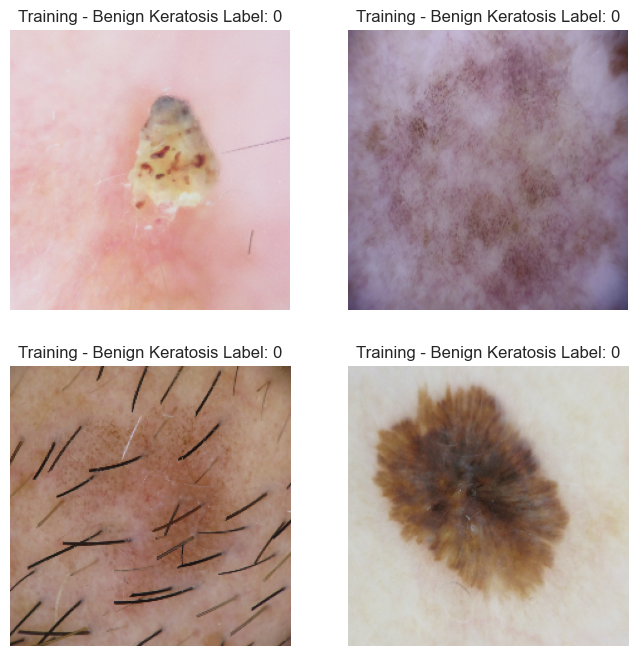

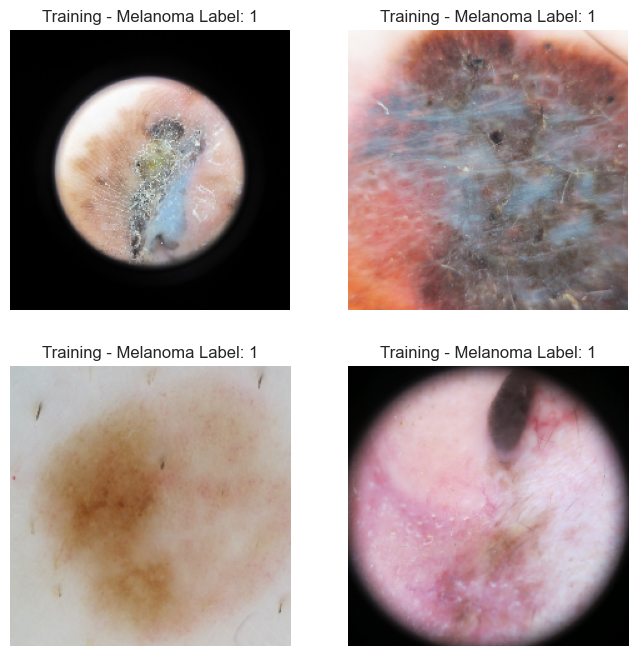

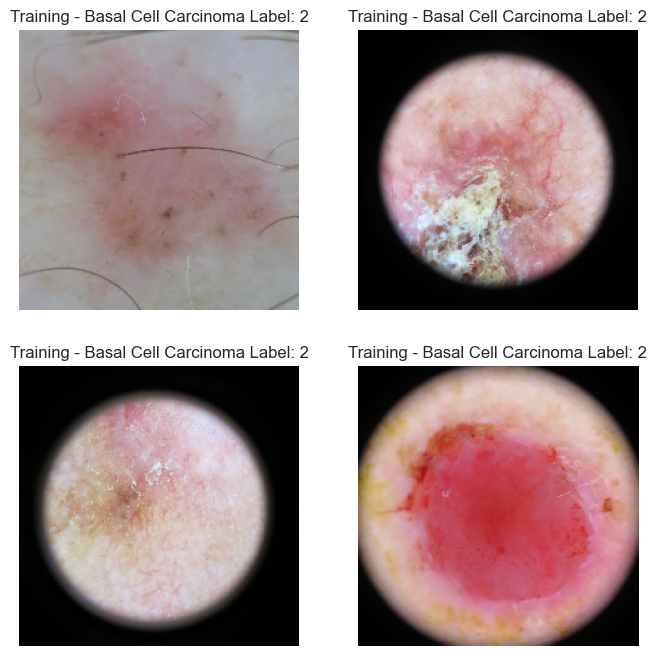

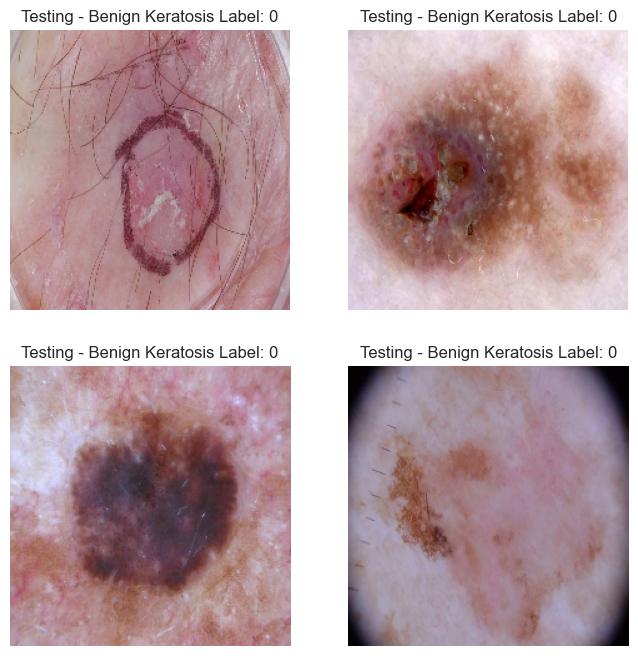

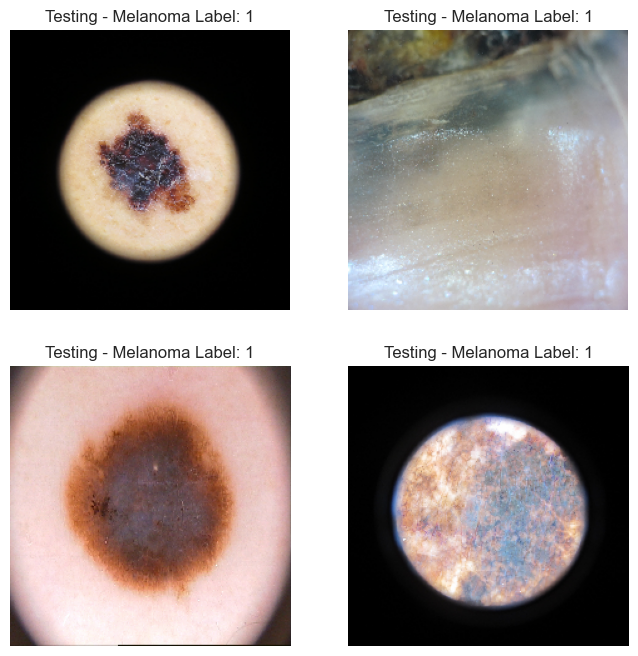

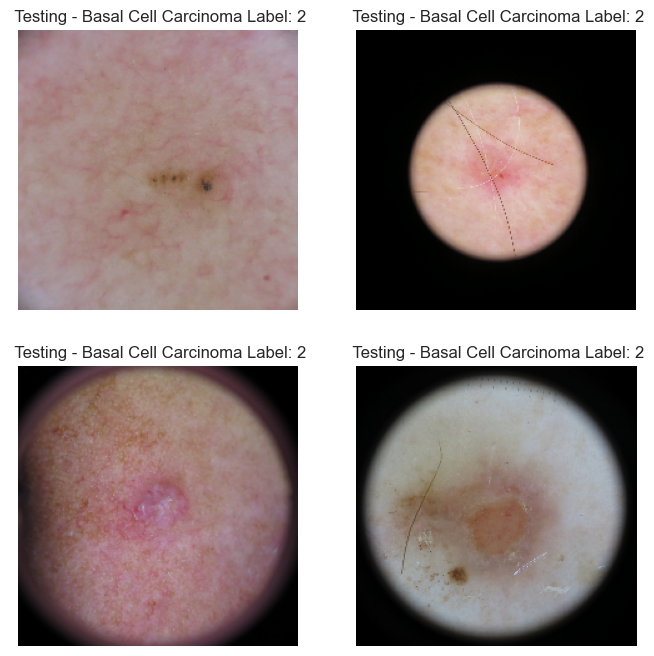

In [11]:
# Function to display random images with labels
def display_random_images_with_labels(data, labels, num_images=4, title_prefix=""):
    rows = 2
    cols = 2
    plt.figure(figsize=(8, 8))
    
    indices =random.sample(range(len(data)), num_images)  # Select random indices
    
    for i, index in enumerate(indices):
        image = data[index]
        label = labels[index]
        
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.title(f'{title_prefix} Label: {label}')
        plt.axis('off')

# Select random images from each class for display
random_indices_benign = random.sample(range(len(x_train[y_train == 0])), 4)
random_indices_melanoma = random.sample(range(len(x_train[y_train == 1])), 4)
random_indices_basal = random.sample(range(len(x_train[y_train == 2])), 4)
random_indices_squammous = random.sample(range(len(x_train[y_train == 3])), 4)

# Display random images from each class in the training set before preprocessing
display_random_images_with_labels(x_train[y_train == 0][random_indices_benign], y_train[y_train == 0][random_indices_benign], num_images=4, title_prefix="Training - Benign Keratosis")
display_random_images_with_labels(x_train[y_train == 1][random_indices_melanoma], y_train[y_train == 1][random_indices_melanoma], num_images=4, title_prefix="Training - Melanoma")
display_random_images_with_labels(x_train[y_train == 2][random_indices_basal], y_train[y_train == 2][random_indices_basal], num_images=4, title_prefix="Training - Basal Cell Carcinoma")
display_random_images_with_labels(x_train[y_train == 3][random_indices_squammous], y_train[y_train == 3][random_indices_squammous], num_images=4, title_prefix="Training - Squammous Cell Carcinoma")

# Show the plot for training set before preprocessing
plt.show()
                                     
# Select random images from each class for display in the testing set
random_indices_benign_test = random.sample(range(len(x_test[y_test == 0])), 4)
random_indices_melanoma_test = random.sample(range(len(x_test[y_test == 1])), 4)
random_indices_basal_test = random.sample(range(len(x_test[y_test == 2])), 4)
random_indices_squammous_test = random.sample(range(len(x_test[y_test == 3])), 4)

# Display random images from each class in the testing set before preprocessing
display_random_images_with_labels(x_test[y_test == 0][random_indices_benign_test], y_test[y_test == 0][random_indices_benign_test], num_images=4, title_prefix="Testing - Benign Keratosis")
display_random_images_with_labels(x_test[y_test == 1][random_indices_melanoma_test], y_test[y_test == 1][random_indices_melanoma_test], num_images=4, title_prefix="Testing - Melanoma")
display_random_images_with_labels(x_test[y_test == 2][random_indices_basal_test], y_test[y_test == 2][random_indices_basal_test], num_images=4, title_prefix=" Testing - Basal Cell Carcinoma")
display_random_images_with_labels(x_test[y_test == 2][random_indices_squammous_test], y_test[y_test == 3][random_indices_squammous_test], num_images=4, title_prefix=" Testing - Squammous Cell Carcinoma")

# Show the plot for testing set before preprocessing
plt.show()

In [12]:
# Image Data Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights based on the training dataset
num_classes = 4  # Adjust according to your dataset
class_labels = np.unique(y_train)  # Extract unique class labels from y_train
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train)
class_wt_dict = dict(enumerate(class_weights))


# Define data augmentation for the training set
trainAug = ImageDataGenerator(
    rotation_range=11,
    zoom_range=0.11,
    width_shift_range=0.10,
    height_shift_range=0.12,
    horizontal_flip=True
    )

# Define data augmentation for the validation set
valAug = ImageDataGenerator()

# Set the batch size
BS = 64

from tensorflow.keras.utils import to_categorical
# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)


train_len = len(x_train)
test_len = len(x_test)



In [14]:
from tensorflow.keras.applications import *
 #Load the pre-trained EfficientNetB4 model without the top (classification) layers
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set the number of layers to fine-tune
fine_tune_layers = 500

# Freeze the first few layers and unfreeze the rest
for layer in base_model.layers[:-fine_tune_layers]:
    layer.trainable = False
for layer in base_model.layers[-fine_tune_layers:]:
    layer.trainable = True


In [15]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, concatenate

# Connect the output of the base model to a new variable x
x = base_model.output
x_maxpool = GlobalMaxPooling2D()(x)
x_avgpool = GlobalAveragePooling2D()(x)
# Combine the output of pooling layers (if both used)
if x_maxpool is not None and x_avgpool is not None:
    x = layers.concatenate([x_maxpool, x_avgpool])
elif x_maxpool is not None:
    x = x_maxpool
elif x_avgpool is not None:
    x = x_avgpool
# Add fully connected layers and dropout
x = layers.Dense(150, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(50, activation='relu')(x)
x = layers.Dropout(0.15)(x)
# Output layer for classification (adjust the number of units for your task)
predictions = layers.Dense(3, activation='softmax')(x)
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

                                                                                                  
 block2a_expand_conv (Conv2  (None, 112, 112, 144)        3456      ['block1b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2a_expand_bn (BatchNo  (None, 112, 112, 144)        576       ['block2a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2a_expand_activation   (None, 112, 112, 144)        0         ['block2a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2a_d

 block2c_expand_conv (Conv2  (None, 56, 56, 192)          6144      ['block2b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2c_expand_bn (BatchNo  (None, 56, 56, 192)          768       ['block2c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2c_expand_activation   (None, 56, 56, 192)          0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_dwconv (DepthwiseC  (None, 56, 56, 192)          1728      ['block2c_expand_activation[0]
 onv2D)   

                                                                                                  
 block3a_expand_conv (Conv2  (None, 56, 56, 192)          6144      ['block2d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block3a_expand_bn (BatchNo  (None, 56, 56, 192)          768       ['block3a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3a_expand_activation   (None, 56, 56, 192)          0         ['block3a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3a_d

 block3c_expand_conv (Conv2  (None, 28, 28, 336)          18816     ['block3b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block3c_expand_bn (BatchNo  (None, 28, 28, 336)          1344      ['block3c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3c_expand_activation   (None, 28, 28, 336)          0         ['block3c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3c_dwconv (DepthwiseC  (None, 28, 28, 336)          8400      ['block3c_expand_activation[0]
 onv2D)   

                                                                                                  
 block4a_expand_conv (Conv2  (None, 28, 28, 336)          18816     ['block3d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4a_expand_bn (BatchNo  (None, 28, 28, 336)          1344      ['block4a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4a_expand_activation   (None, 28, 28, 336)          0         ['block4a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4a_d

 block4c_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block4b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4c_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_expand_activation   (None, 14, 14, 672)          0         ['block4c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4c_dwconv (DepthwiseC  (None, 14, 14, 672)          6048      ['block4c_expand_activation[0]
 onv2D)   

                                                                                                  
 block4e_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block4d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4e_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block4e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4e_expand_activation   (None, 14, 14, 672)          0         ['block4e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4e_d

                                                                     'block4e_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block4f_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block5a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5a_expand_activation   (None, 14, 14, 672)          0         ['block5a_expand_bn[0][0]']   
 (Activation)                                                                                     
          

                                                                                                  
 block5c_expand_bn (BatchNo  (None, 14, 14, 960)          3840      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 14, 14, 960)          0         ['block5c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5c_dwconv (DepthwiseC  (None, 14, 14, 960)          24000     ['block5c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5c_b

 D)                                                                                               
                                                                                                  
 block5e_expand_bn (BatchNo  (None, 14, 14, 960)          3840      ['block5e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5e_expand_activation   (None, 14, 14, 960)          0         ['block5e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5e_dwconv (DepthwiseC  (None, 14, 14, 960)          24000     ['block5e_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block6a_expand_conv (Conv2  (None, 14, 14, 960)          153600    ['block5f_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6a_expand_bn (BatchNo  (None, 14, 14, 960)          3840      ['block6a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6a_expand_activation   (None, 14, 14, 960)          0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6a_dwconv_pad (ZeroPa  (None, 17, 17, 960)          0         ['block6a_expand_activation[0]
 dding2D) 

 D)                                                                                               
                                                                                                  
 block6c_expand_bn (BatchNo  (None, 7, 7, 1632)           6528      ['block6c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6c_expand_activation   (None, 7, 7, 1632)           0         ['block6c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, 7, 7, 1632)           40800     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block6e_expand_conv (Conv2  (None, 7, 7, 1632)           443904    ['block6d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6e_expand_bn (BatchNo  (None, 7, 7, 1632)           6528      ['block6e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6e_expand_activation   (None, 7, 7, 1632)           0         ['block6e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6e_dwconv (DepthwiseC  (None, 7, 7, 1632)           40800     ['block6e_expand_activation[0]
 onv2D)   

                                                                                                  
 block6g_expand_conv (Conv2  (None, 7, 7, 1632)           443904    ['block6f_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6g_expand_bn (BatchNo  (None, 7, 7, 1632)           6528      ['block6g_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6g_expand_activation   (None, 7, 7, 1632)           0         ['block6g_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6g_d

                                                                     'block6g_add[0][0]']         
                                                                                                  
 block7a_expand_conv (Conv2  (None, 7, 7, 1632)           443904    ['block6h_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block7a_expand_bn (BatchNo  (None, 7, 7, 1632)           6528      ['block7a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block7a_expand_activation   (None, 7, 7, 1632)           0         ['block7a_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 top_bn (BatchNormalization  (None, 7, 7, 1792)           7168      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 7, 7, 1792)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 global_max_pooling2d (Glob  (None, 1792)                 0         ['top_activation[0][0]']      
 alMaxPooling2D)                                                                                  
                                                                                                  
 global_average_pooling2d (  (None, 1792)                 0         ['top_activation[0][0]']      
 GlobalAve

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
model_chkpt = ModelCheckpoint('C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\imageskin.hdf5',save_best_only=True, monitor='val_loss',mode='min',verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.31, patience=2,mode='min', min_lr=0.0000001,verbose=1)

callback_list = [model_chkpt,lr_reduce]

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Modify your data generators to yield a tuple of (image, metadata) as inputs
trainGen = trainAug.flow(x_train, y_train_one_hot, batch_size=BS)
valGen = valAug.flow(x_test, y_test_one_hot, batch_size=BS)
# Train the model
history = model.fit(
    trainGen,
    epochs=25,
    validation_data=valGen,
    class_weight=class_wt_dict,
    callbacks=callback_list
)

Epoch 1/25
 60/131 [============>.................] - ETA: 13:03 - loss: 1.0071 - accuracy: 0.5513

In [ ]:
from tensorflow.keras.models import load_model
skincancermodel = load_model("C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\Training\\imageskin.hdf5")

In [ ]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = skincancermodel.evaluate(x_train, y_train_one_hot, verbose=1)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_accuracy)
# Evaluate the model on the testing dataset
test_loss, test_accuracy = skincancermodel.evaluate(x_test, y_test_one_hot, verbose=1)
print('Testing Loss:', test_loss)
print('Testing Accuracy:', test_accuracy)


In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Make predictions on the test dataset
predicted_probs = skincancermodel.predict(x_test, batch_size=16, verbose=0)

# Calculate the confusion matrix using probabilities
confusion_mtx = confusion_matrix(np.argmax(y_test_one_hot, axis=1), np.argmax(predicted_probs, axis=1))

# Define class labels
class_labels = ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma','Squammous Cel Carcinoma']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report with probabilities
report = classification_report(np.argmax(y_test_one_hot, axis=1), np.argmax(predicted_probs, axis=1), target_names=class_labels)
print(report)

In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(class_labels)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
lw = 2
colors = cycle(['aqua', 'purple', 'red','yellow'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], class_labels[i]))

plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', lw=lw,
         label='macro-average ROC curve (area = %0.2f)')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Define the paths to the directories on your local machine
benignkeratosistest_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\BenignKeratosisTest"
melanomatest_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\MelanomaTest"
basalcelltest_directory = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\BasalCellCarcinomaTest"
squamoustest_directory="C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\SquamousCellCarcinomaTest"
# List the files and directories in each of the specified directories
benigntestimages=os.listdir(benignkeratosistest_directory)
melanomatestimages = os.listdir(melanomatest_directory)
basaltestimages = os.listdir(basalcelltest_directory)
squamoustestimages=os.listdir(squamoustest_directory)
benigntest_count = len(benigntestimages)
melanomatest_count = len(melanomatestimages)
basaltest_count = len(basaltestimages)
squamoustest_count = len(squamoustestimages)
totaltest_count=benigntest_count+melanomatest_count+basaltest_count+squamoustest_count
print('The total no of images:',totaltest_count)

In [ ]:
# Function to load test images and assign labels
def load_test_images_and_labels(directory, label):
    data, labels = [], []

    for image_path in directory.glob('*.jpg'):
        if image_path.is_file():
            try:
                image = cv2.imread(str(image_path))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure images have RGB channels
                image = cv2.resize(image, (224, 224))
                data.append(image)
                labels.append(label)
                print(f"Loaded test image: {image_path.name} with label {label}, size: {image.shape}")
            except AttributeError:
                print(f"Error loading test image: {image_path.name}")

    return data, labels

# Load test images and assign labels for each category
benign_test_data, benign_test_labels = load_test_images_and_labels(Path(benignkeratosistest_directory), 0)
melanoma_test_data, melanoma_test_labels = load_test_images_and_labels(Path(melanomatest_directory), 1)
basal_test_data, basal_test_labels = load_test_images_and_labels(Path(basalcelltest_directory), 2)
squammous_test_data, squammous_test_labels = load_test_images_and_labels(Path(squamoustest_directory), 3)
# Combine test data and labels for all categories
test_data = np.concatenate((benign_test_data, melanoma_test_data, basal_test_data,squammous_test_data), axis=0)
test_labels = np.concatenate((benign_test_labels, melanoma_test_labels, basal_test_labels,squammous_test_labels ), axis=0)

# Verify the shape of the test data and labels arrays
print("Test Data shape:", test_data.shape)
print("Test Labels shape:", test_labels.shape)

In [ ]:
# Convert test features and labels to NumPy arrays
test_feats, test_labels = np.array(test_data), np.array(test_labels)

# Define paths for saving and loading test features and labels
test_feats_save_path, test_labels_save_path = "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\feats_test.npy", "C:\\Users\\Asus\\Desktop\\archive\\ISIC_2019_Training_Input\\testing\\labels_test.npy"

# Save the test arrays to the specified paths
np.save(test_feats_save_path, test_feats)
np.save(test_labels_save_path, test_labels)

# Confirm that the test arrays have been saved
print("Test Features saved to:", test_feats_save_path)
print("Test Labels saved to:", test_labels_save_path)

# Load the test features and labels
loaded_test_feats, loaded_test_labels = np.load(test_feats_save_path), np.load(test_labels_save_path)
print("Test Features shape:", loaded_test_feats.shape)
print("Test Labels shape:", loaded_test_labels.shape)
x_valid = loaded_test_feats.astype('float32')/255
y_valid=to_categorical(loaded_test_labels,3)


In [ ]:
# Make predictions on the test dataset
predicted_probs = skincancermodel.predict(x_valid, batch_size=16, verbose=0)

# Calculate the confusion matrix using probabilities
confusion_mtx = confusion_matrix(np.argmax(y_valid, axis=1), np.argmax(predicted_probs, axis=1))

# Define class labels
class_labels = ['Benign Keratosis', 'Melanoma', 'Basal Cell Carcinoma','Squammous Cell Carcinoma']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report with probabilities
report = classification_report(np.argmax(y_valid, axis=1), np.argmax(predicted_probs, axis=1), target_names=class_labels)
print(report)